# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jonathan Adriel
- **Email:** m010d4ky2295@bangkit.academy
- **ID Dicoding:** jonathan_adriel

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda antara tahun 2011 dan 2012?
- Pada musim apa antara tahun 2011 dan 2012 jumlah penyewaan sepeda tertinggi?
- Pada jam berapa antara tahun 2011 dan 2012 rata-rata jumlah penyewaan sepeda tertinggi?

## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

#### Load day dataset

In [45]:
day_df = pd.read_csv("data/day.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load hour dataset

In [46]:
hour_df = pd.read_csv("data/hour.csv")

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai day dataset

In [47]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Informasi di atas menunjukkan bahwa seluruh kolom memiliki 731 non-null value, yang berarti bahwa tidak ada missing value. Namun, terdapat kesalahan data type pada dteday. Seharusnya, dteday memiliki data type datetime, bukan object.

In [48]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Seperti yang telah disebutkan sebelumnya, tidak ada missing value pada dataset tersebut.

In [49]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dataset tersebut tidak memiliki data yang duplikat juga

In [50]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan ringkasan parameter statistik di atas, tidak ada anomali pada dataset tersebut.

#### Menilai hour dataset

In [51]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Informasi di atas menunjukkan bahwa seluruh kolom memiliki 17379 non-null value, yang berarti bahwa tidak ada missing value. Namun, terdapat kesalahan data type pada dteday. Seharusnya, dteday memiliki data type datetime, bukan object.

In [52]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Seperti yang telah disebutkan sebelumnya, tidak ada missing value pada dataset tersebut.

In [53]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


Dataset tersebut tidak memiliki data yang duplikat juga

In [54]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan ringkasan parameter statistik di atas, tidak ada anomali pada dataset tersebut.

### Cleaning Data

#### Cleaning day dataset

In [55]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [56]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Cleaning hour dataset

In [57]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [58]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Eksplorasi day dataset

In [59]:
day_df.describe(include="all")

<ipython-input-59-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan informasi di atas, dapat diketahui sebagai berikut:
- Terdapat 731 data harian penyewaan sepeda dari 2011-01-01 00:00:00 hingga 2012-12-31 00:00:00
- Rata-rata jumlah penyewaan sepeda per hari adalah 4504
- Standar deviasi jumlah penyewaan sepeda pada dataset tersebut adalah 1937, yang menunjukkan variasi jumlah penyewaan sepeda per hari yang cukup tinggi
- Minimal jumlah penyewaan sepeda per hari adalah 22
- Maksimal jumlah penyewaan sepeda per hari adalah 8714
- Terlihat bahwa mean < median (50%) yang menunjukkan bahwa dataset tersebut bersifat left-skewed, menunjukkan peningkatan tren penyewaan sepeda dari tahun 2011 hingga 2012

In [60]:
penyewaan_per_musim = day_df.groupby(['yr', 'season'])['cnt'].sum()

penyewaan_per_musim

yr  season
0   1         150000
    2         347316
    3         419650
    4         326137
1   1         321348
    2         571273
    3         641479
    4         515476
Name: cnt, dtype: int64

Berdasarkan informasi di atas, dapat diketahui jumlah penyewaan sepeda harian tertinggi pada musim fall (gugur), baik pada tahun 2011 maupun 2012.

In [61]:
day_df.groupby('yr')['cnt'].sum()

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

Kemudian, terlihat bahwa jumlah penyewaan sepeda harian pada tahun 2012 lebih banyak daripada tahun 2011, menunjukkan tren peningkatan dalam penyewaan sepeda.

In [62]:
tren_penyewaan_sepeda = day_df.groupby(["yr", "mnth"])["cnt"].sum().reset_index()

tren_penyewaan_sepeda

,yr,mnth,cnt
0,0,1,38189
1,0,2,48215
2,0,3,64045
3,0,4,94870
4,0,5,135821
5,0,6,143512
6,0,7,141341
7,0,8,136691
8,0,9,127418
9,0,10,123511


Peningkatan tren penyewaan sepeda antara tahun 2011 dan 2012 dapat dilihat secara lebih detail pada dataframe di atas.

### Eksplorasi hour dataset

In [63]:
hour_df.describe(include="all")

<ipython-input-63-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan informasi di atas, dapat diketahui sebagai berikut:
- Terdapat 17379 data per jam penyewaan sepeda dari 2011-01-01 00:00:00 hingga 2012-12-31 00:00:00
- Rata-rata jumlah penyewaan sepeda per jam adalah 189
- Standar deviasi jumlah penyewaan sepeda pada dataset tersebut adalah 181, yang menunjukkan variasi jumlah penyewaan sepeda per jam yang cukup tinggi
- Minimal jumlah penyewaan sepeda per jam adalah 1
- Maksimal jumlah penyewaan sepeda per jam adalah 977

In [64]:
penyewaan_per_jam = hour_df.groupby(['yr', 'hr'])['cnt'].agg(['mean', 'max', 'min']).reset_index()

penyewaan_per_jam

,yr,hr,mean,max,min
0,0,0,43.047091,177,2
1,0,1,26.550000,124,1
2,0,2,18.923295,106,1
3,0,3,10.061404,59,1
4,0,4,5.391691,23,1
5,0,5,14.609065,39,1
6,0,6,57.620499,145,1
7,0,7,156.831956,370,1
8,0,8,262.994490,564,5
9,0,9,163.873278,280,14


Di atas merupakan jumlah penyewaan sepeda per jam antara tahun 2011 dan 2012. Untuk memudahkan, akan dilakukan pengurutan secara decreasing untuk mengetahui jam mana yang memiliki jumlah penyewaan tertinggi.

In [65]:
penyewaan_per_jam.sort_values(by='mean', ascending=False)

,yr,hr,mean,max,min
41,1,17,573.227397,976,26
42,1,18,528.183562,977,26
32,1,8,454.763736,839,11
40,1,16,389.386301,783,13
43,1,19,386.265753,743,18
17,0,17,349.676712,638,15
18,0,18,322.272727,621,23
37,1,13,316.657534,760,15
36,1,12,316.527473,776,10
39,1,15,313.860274,750,13


Berdasarkan data di atas, dapat diketahui bahwa rata-rata jumlah penyewaan sepeda per jam tertinggi pada jam 17:00, baik pada tahun 2011 maupun 2012.

### Advanced Analysis Technique

Di sini, saya akan menerapkan salah satu teknik analisis lanjut, yaitu regresi polinomial berderajat 2 pada data tersebut untuk memodelkan tren penyewaan sepeda per bulan dari tahun 2011 hingga 2012. Dengan demikian, kita dapat melihat pola tren keseluruhan dengan lebih baik dan memprediksi jumlah penyewaan sepeda di bulan-bulan mendatang berdasarkan model yang dihasilkan tersebut.

In [66]:
# Applying advanced analysis technique: Polynomial regression of degree 2
coefficients = np.polyfit(tren_penyewaan_sepeda["mnth"], tren_penyewaan_sepeda["cnt"], 2)
polynomial = np.poly1d(coefficients)

In [67]:
new_months = np.arange(1, 13)

# Predict jumlah penyewaan using the polynomial function
predicted_counts = polynomial(new_months)

Hasilnya adalah sebagai berikut:

In [76]:
predicted_df = pd.DataFrame({'Bulan Mendatang Ke-': new_months, 'Prediksi Jumlah Penyewaan': predicted_counts})

print(predicted_df)

    Bulan Mendatang Ke-  Prediksi Jumlah Penyewaan
0                     1               53060.064560
1                     2               88937.548576
2                     3              118640.963412
3                     4              142170.309066
4                     5              159525.585539
5                     6              170706.792832
6                     7              175713.930944
7                     8              174546.999875
8                     9              167205.999625
9                    10              153690.930195
10                   11              134001.791583
11                   12              108138.583791


## Visualization & Explanatory Analysis

### Bagaimana tren penyewaan sepeda antara tahun 2011 dan 2012?

Sebelumnya, kita telah memiliki dataframe tren_penyewaan_sepeda. Namun, agar bulan dapat lebih terbaca, akan ditambahkan kolom baru yang merepresentasikan bulan dalam kata.

In [69]:
month_dict = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

year_dict = {
    0: "2011",
    1: "2012"
}

formatted_months = []
for index, row in tren_penyewaan_sepeda.iterrows():
    month = month_dict[row["mnth"]]
    year = year_dict[row["yr"]]
    formatted_months.append(f"{month}, {year}")

tren_penyewaan_sepeda["formatted_months"] = formatted_months

tren_penyewaan_sepeda

,yr,mnth,cnt,formatted_months
0,0,1,38189,"Jan, 2011"
1,0,2,48215,"Feb, 2011"
2,0,3,64045,"Mar, 2011"
3,0,4,94870,"Apr, 2011"
4,0,5,135821,"May, 2011"
5,0,6,143512,"Jun, 2011"
6,0,7,141341,"Jul, 2011"
7,0,8,136691,"Aug, 2011"
8,0,9,127418,"Sep, 2011"
9,0,10,123511,"Oct, 2011"


Kini, akan divisualisasikan menggunakan line graph mengingat data tersebut bersifat time series. Dengan mengikutsertakan teknik analisis lanjut sebelumnya, yaitu regresi polinomial berderajat 2 pada data tersebut, diperoleh visualisasi sebagai berikut:

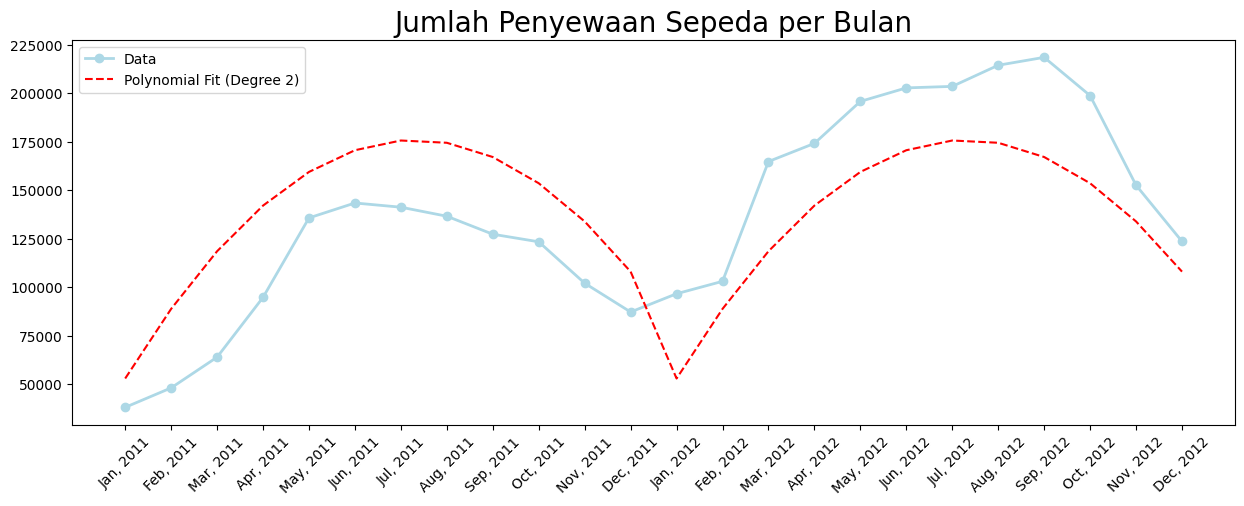

In [70]:
poly_y = polynomial(tren_penyewaan_sepeda["mnth"])

plt.figure(figsize=(15, 5))
plt.plot(tren_penyewaan_sepeda["formatted_months"], tren_penyewaan_sepeda["cnt"], marker='o', linewidth=2, color="lightblue", label="Data")
plt.plot(tren_penyewaan_sepeda["formatted_months"], poly_y, color="red", linestyle="--", label="Polynomial Fit (Degree 2)")
plt.title("Jumlah Penyewaan Sepeda per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(rotation=45)
plt.legend()
plt.show()

Terlihat bahwa tren penyewaan sepeda mengalami peningkatan antara tahun 2011 dan tahun 2012.

### Pada musim apa antara tahun 2011 dan 2012 jumlah penyewaan sepeda tertinggi?

Sebelumnya, kita telah memiliki series penyewaan_per_musim. Kini, akan dibentuk menjadi dataframe, kemudian ditambahkan kolom baru yang merepresentasikan musim dalam kata agar lebih terbaca.

In [71]:
penyewaan_per_musim = pd.DataFrame(penyewaan_per_musim).reset_index()

penyewaan_per_musim

,yr,season,cnt
0,0,1,150000
1,0,2,347316
2,0,3,419650
3,0,4,326137
4,1,1,321348
5,1,2,571273
6,1,3,641479
7,1,4,515476


In [72]:
season_dict = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

formatted_seasons = []
for index, row in penyewaan_per_musim.iterrows():
    formatted_season = season_dict[row["season"]]
    formatted_seasons.append(formatted_season)

penyewaan_per_musim["formatted_seasons"] = formatted_seasons

penyewaan_per_musim

,yr,season,cnt,formatted_seasons
0,0,1,150000,Spring
1,0,2,347316,Summer
2,0,3,419650,Fall
3,0,4,326137,Winter
4,1,1,321348,Spring
5,1,2,571273,Summer
6,1,3,641479,Fall
7,1,4,515476,Winter


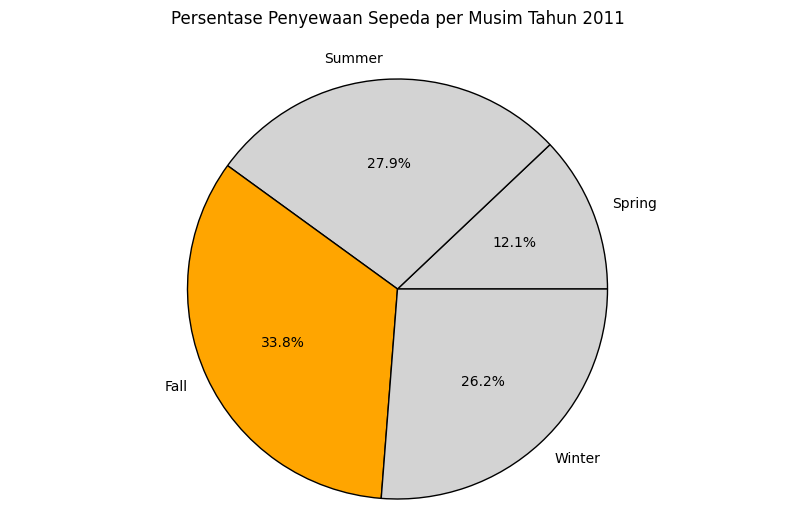

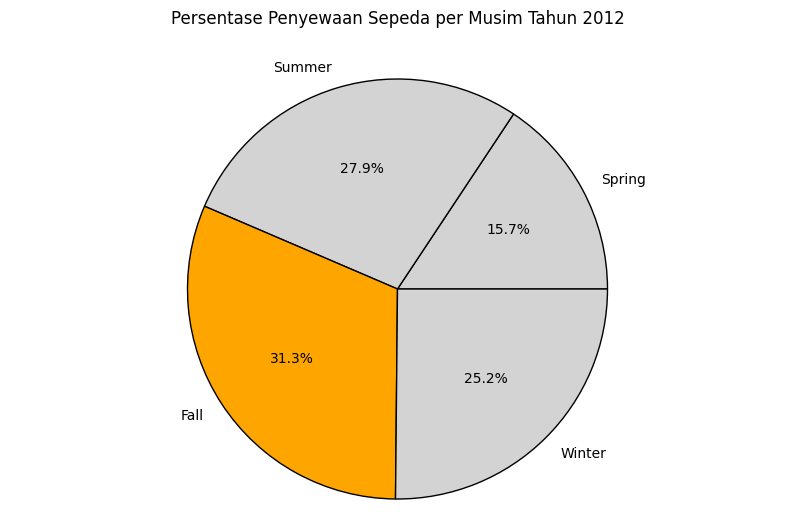

In [73]:
year_2011 = penyewaan_per_musim[penyewaan_per_musim["yr"] == 0]
year_2012 = penyewaan_per_musim[penyewaan_per_musim["yr"] == 1]

# Get colors for year_2011 pie chart
year_2011_colors = ["lightgrey"] * len(year_2011)
max_index = year_2011["cnt"].idxmax()
year_2011_colors[max_index] = "orange"

# Get colors for year_2012 pie chart
year_2012_colors = ["lightgrey"] * len(year_2012)
max_index = year_2012["cnt"].idxmax() - 4
year_2012_colors[max_index] = "orange"

# Create year_2011 pie chart
plt.figure(figsize=(10, 6))
plt.pie(year_2011["cnt"], labels=year_2011["formatted_seasons"], autopct="%1.1f%%", colors=year_2011_colors, wedgeprops=dict(edgecolor='black'))
plt.title("Persentase Penyewaan Sepeda per Musim Tahun 2011", pad=25)
plt.axis("equal")
plt.show()

# Create year_2012 pie chart
plt.figure(figsize=(10, 6))
plt.pie(year_2012["cnt"], labels=year_2012["formatted_seasons"], autopct="%1.1f%%", colors=year_2012_colors, wedgeprops=dict(edgecolor='black'))
plt.title("Persentase Penyewaan Sepeda per Musim Tahun 2012", pad=25)
plt.axis("equal")
plt.show()

Berdasarkan pie chart di atas, dapat diketahui jumlah penyewaan sepeda harian tertinggi pada musim fall (gugur), baik pada tahun 2011 maupun 2012.

### Pada jam berapa antara tahun 2011 dan 2012 rata-rata jumlah penyewaan sepeda tertinggi?

In [74]:
def show_barchart(df, year):
  penyewaan_year = df[df["yr"] == year]

  hours = penyewaan_year["hr"]
  average_penyewaan = penyewaan_year["mean"]

  plt.figure(figsize=(10, 6))
  plt.bar(hours, average_penyewaan, color="lightgrey")

  # Highlight the bar with the highest average
  highest_bar_index = average_penyewaan.idxmax()
  plt.bar(penyewaan_year.loc[highest_bar_index, "hr"], average_penyewaan.max(), color="orange")

  plt.title(f"Rata-Rata Jumlah Sewa Sepeda per Jam Tahun 201{year+1}")
  plt.legend()
  plt.grid(True)

  plt.show()

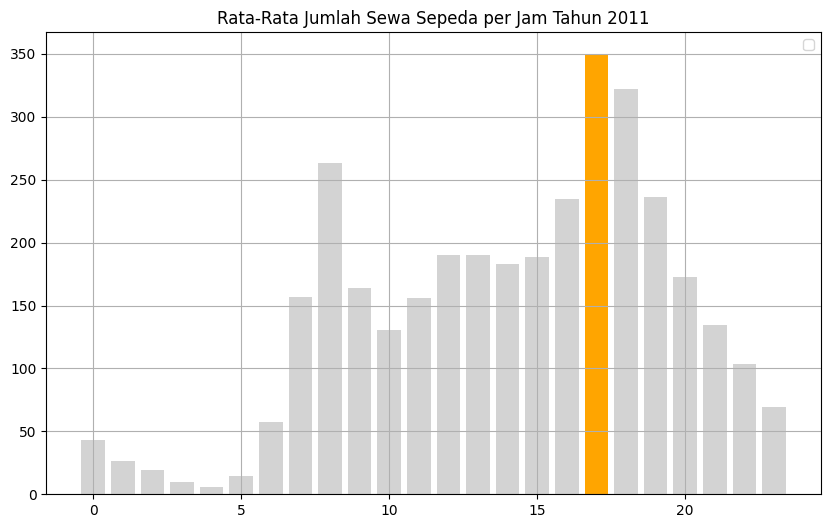

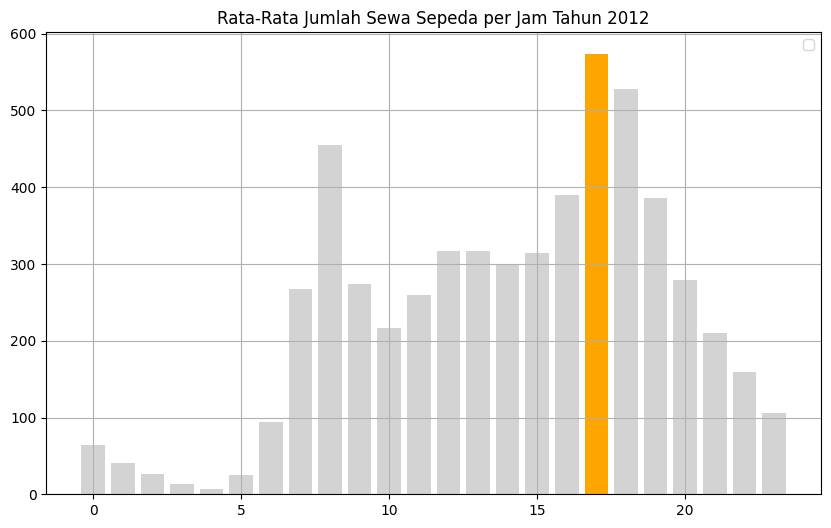

In [75]:
show_barchart(penyewaan_per_jam, 0)
show_barchart(penyewaan_per_jam, 1)

Berdasarkan bar chart di atas, dapat diketahui bahwa rata-rata jumlah penyewaan sepeda per jam tertinggi pada jam 17:00, baik pada tahun 2011 maupun 2012.

## Conclusion

- Bagaimana tren penyewaan sepeda antara tahun 2011 dan 2012?<br>
 Tren penyewaan sepeda mengalami peningkatan antara tahun 2011 dan tahun 2012.

- Pada musim apa antara tahun 2011 dan 2012 jumlah penyewaan sepeda tertinggi?<br>
Jumlah penyewaan sepeda harian tertinggi pada musim fall (gugur), baik pada tahun 2011 maupun 2012. Kemudian, diikuti oleh summer, winter, dan spring, baik pada tahun 2011 maupun 2012.

- Pada jam berapa antara tahun 2011 dan 2012 rata-rata jumlah penyewaan sepeda tertinggi?<br>
Rata-rata jumlah penyewaan sepeda per jam tertinggi pada jam 17:00, baik pada tahun 2011 maupun 2012.

Mengikutsertakan informasi dari hasil teknik analisis lanjut, dapat disimpulkan bahwa Tren penyewaan sepeda memiliki kecenderungan tertinggi pada pertengahan tahun. Peningkatan penyewaan sepeda dimulai pada awal tahun, kemudian setelah mencapai titik tertinggi, akan menurun kembali hingga akhir tahun.

Terlihat pola bahwa penyewaan sepeda harian secara berurutan dari yang tertinggi hingga terendah terdapat pada musim fall, summer, winter, dan spring.

Secara keseluruhan, rata-rata jumlah penyewaan sepeda tertinggi memiliki kecenderungan berada pada jam 17:00.